In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
film_data = pd.read_csv('meta_data7.csv', encoding = "ISO-8859-1")
ch_mapping = pd.read_csv('character_mapping.csv', encoding = "ISO-8859-1")
ch_list = pd.read_csv('character_list5.csv', encoding = "ISO-8859-1")

In [4]:
film_data

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340
...,...,...,...,...,...,...
1995,3765,tt0403702,Youth in Revolt,2009,17.0,7766777656545344243247443314443342644634343374...
1996,3766,tt1790885,Zero Dark Thirty,2012,104.0,5677677556654467677515744741445336433333000120...
1997,8158,tt0120906,Zero Effect,1998,3.0,4777774477777647777777777755677755423677777777...
1998,3768,tt0421090,Zerophilia,2005,NaN,7647774446763347777777763774163455777777777634...


In [5]:
ch_mapping

,script_id,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687
2,1,tt0147800,chastity,chastity,nm0005517
3,1,tt0147800,joey,joey donner,nm0005080
4,1,tt0147800,kat,kat stratford,nm0005466
...,...,...,...,...,...
99385,9254,tt0101414,lumiere,lumiere,nm0001583
99386,9254,tt0101414,maurice,maurice,nm0263591
99387,9254,tt0101414,mrs potts,mrs. potts,nm0001450
99388,9254,tt0101414,townsfolk,NaN,nm0621121


In [13]:
ch_list

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0
...,...,...,...,...,...
23043,9254,lumiere,1063,m,56.0
23044,9254,maurice,1107,m,71.0
23045,9254,monsieur d'arqu,114,m,58.0
23046,9254,mrs. potts,564,f,66.0


In [17]:
# Missing Characters in ch_list
ch_list[ch_list.imdb_character_name.isna()]


,script_id,imdb_character_name,words,gender,age
4656,1807,NaN,146,f,NaN
19448,7445,NaN,520,f,NaN


In [27]:
film_data[film_data.gross.isna()]

,script_id,imdb_id,title,year,gross,lines_data
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
20,7678,tt0075612,3 Women,1977,NaN,020000301001012230
31,4022,tt0066921,A Clockwork Orange,1971,NaN,7744777777777775445777777777777734555567777777...
61,1564,tt0088683,Agnes of God,1985,NaN,4300000000000000000000000000011000000000001311...
63,650,tt0083530,Airplane II: The Sequel,1982,NaN,7747777764645644334477777354524734154357433376...
...,...,...,...,...,...,...
1961,7207,tt2231253,Wild Card,2015,NaN,3465434666447362675777777334426357776567777777...
1965,4896,tt0448179,Wild Things: Diamonds in the Rough,2005,NaN,0031410654144244442653543635203246331332014442...
1970,3729,tt0486051,Wind Chill,2007,NaN,4324343444353443443533447442335433444444434443...
1974,6701,tt0051201,Witness for the Prosecution,1957,NaN,5675666667777677766777777777330434257776423367...


In [44]:
## Amount of dialogue per movie ~ time

# Find total amount of dialogue per movie
ch_listbymovie = ch_list.groupby('script_id')['words'].sum().reset_index(name = 'total_dialogue')
ch_listbymovie = ch_listbymovie.sort_values('total_dialogue')
ch_listbymovie

,script_id,total_dialogue
771,3161,1175
1092,4460,1186
1004,4125,1375
1360,5499,1387
1095,4473,1405
...,...,...
682,2821,41490
310,1538,42338
544,2352,43874
636,2682,58832


In [47]:
# merge datasets to get total dialogue ~ year

dialogue_year = pd.merge(ch_listbymovie, film_data, on = 'script_id')
dialogue_year.head()

,script_id,total_dialogue,imdb_id,title,year,gross,lines_data
0,3161,1175,tt0239860,Quantum Project,2000,NaN,477553454354777643
1,4460,1186,tt0298388,Jonah: A VeggieTales Movie,2002,38.0,3433337777777772
2,4125,1375,tt0112887,The Doom Generation,1995,NaN,334334344664474543445556242
3,5499,1387,tt3808342,Son of Saul,2015,0.0,77777777777777777777777777777777777777777777774
4,4473,1405,tt0116768,Kids in the Hall: Brain Candy,1996,5.0,77623677777767363


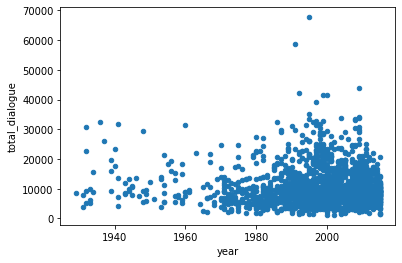

In [64]:
# plot dialogue ~ year 
dialogue_year.plot.scatter(x = "year", y = "total_dialogue")
# to me, it doesn't look like there's evidence of a widespread increase in dialogue, but a lot more data on movies in more recent years.

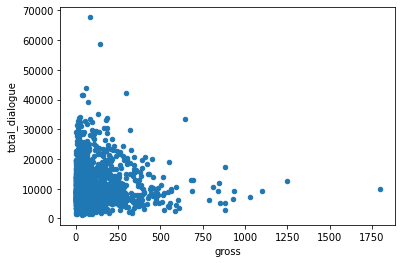

In [74]:
## dialogue ~ film gross value
# remove na values, still 19 films w/ gross 0
dialogue_gross = dialogue_year[dialogue_year.gross >= 0]
dialogue_gross.plot.scatter(x = "gross", y = "total_dialogue")
# is there any way to remove/identify outliers in the data?

19